# imputation

In [1]:
import re
from collections import defaultdict

# Initialize dictionary to store the data
data = defaultdict(lambda: defaultdict(dict))

# Read the file
file_path = 'save/imputation/imputation_summary.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

# Parse the file
current_corruption_ratio = None
imputation_noise_level = None

for line in lines:
    line = line.strip()
    if line.startswith("corruption_ratio"):
        # Extract corruption_ratio and subset_ratio
        match = re.search(r'corruption_ratio = ([0-9.]+), imputation_noise_level = (-?[0-9.]+)', line)
        if match:
            current_corruption_ratio = float(match.group(1))
            imputation_noise_level = float(match.group(2))
    elif line and not line.startswith("GLUE score"):
        # Extract task and score
        parts = line.split()
        if len(parts) == 3:
            task, score = parts[1 :]
            try:
                score = float(score)
                # Store in the dictionary
                data[(current_corruption_ratio, imputation_noise_level)][task] = score
            except ValueError:
                pass

print(data)

defaultdict(<function <lambda> at 0x104b70e50>, {(0.1, 0.0): defaultdict(<class 'dict'>, {'cola': 0.583446, 'sst2': 0.919725, 'mrpc': 0.860294, 'stsb': 0.896988, 'qqp': 0.909721, 'mnli': 0.843709, 'qnli': 0.908658, 'rte': 0.646209, 'wnli': 0.56338}), (0.2, 0.0): defaultdict(<class 'dict'>, {'cola': 0.583446, 'sst2': 0.919725, 'mrpc': 0.860294, 'stsb': 0.896988, 'qqp': 0.909721, 'mnli': 0.843709, 'qnli': 0.908658, 'rte': 0.646209, 'wnli': 0.56338}), (0.3, 0.0): defaultdict(<class 'dict'>, {'cola': 0.583446, 'sst2': 0.919725, 'mrpc': 0.860294, 'stsb': 0.896988, 'qqp': 0.909721, 'mnli': 0.843709, 'qnli': 0.908658, 'rte': 0.646209, 'wnli': 0.56338}), (0.4, 0.0): defaultdict(<class 'dict'>, {'cola': 0.583446, 'sst2': 0.919725, 'mrpc': 0.860294, 'stsb': 0.896988, 'qqp': 0.909721, 'mnli': 0.843709, 'qnli': 0.908658, 'rte': 0.646209, 'wnli': 0.56338}), (0.5, 0.0): defaultdict(<class 'dict'>, {'cola': 0.583446, 'sst2': 0.919725, 'mrpc': 0.860294, 'stsb': 0.896988, 'qqp': 0.909721, 'mnli': 0.843

In [2]:
# handle data
# compute glue score
'''
labels = ['CoLA', 'SST-2', 'MRPC', 'STS-B', 'QQP', 'MNLI', 'QNLI', 'RTE', 'WNLI', 'AVG']
labels2 = ['cola', 'sst2', 'mrpc', 'stsb', 'qqp', 'mnli', 'qnli', 'rte', 'wnli', 'glue']
# recompute the average ignoring the 'wnli'
scores_ignore_wnli = scores[:, :-2]
# substract the baseline values
scores_ignore_wnli[:, 1] = scores_ignore_wnli[:, 1] - 0.5  # SST2, index 1, binary classification
scores_ignore_wnli[:, 2] = scores_ignore_wnli[:, 2] - 0.5  # MRPC, index 2, binary classification
scores_ignore_wnli[:, 4] = scores_ignore_wnli[:, 4] - 0.5  # QQP, index 4, binary classification
scores_ignore_wnli[:, 5] = scores_ignore_wnli[:, 5] - 0.33333  # MNLI, index 5, tenary classification
scores_ignore_wnli[:, 6] = scores_ignore_wnli[:, 6] - 0.5  # QNLI, index 6, binary classification
scores_ignore_wnli[:, 7] = scores_ignore_wnli[:, 7] - 0.5  # RTE, index 7, binary classification
'''

for key, value in data.items():
    score = (data[key]['cola']
        + data[key]['sst2'] - 0.5
        + data[key]['mrpc'] - 0.5
        + data[key]['stsb']
        + data[key]['qqp'] - 0.5
        + data[key]['mnli'] -0.33333
        + data[key]['qnli'] - 0.5
        + data[key]['rte'] - 0.5
        + data[key]['mrpc'] - 0.5) / 9
    data[key]['score'] = score
print(data)

defaultdict(<function <lambda> at 0x104b70e50>, {(0.1, 0.0): defaultdict(<class 'dict'>, {'cola': 0.583446, 'sst2': 0.919725, 'mrpc': 0.860294, 'stsb': 0.896988, 'qqp': 0.909721, 'mnli': 0.843709, 'qnli': 0.908658, 'rte': 0.646209, 'wnli': 0.56338, 'score': 0.45507933333333334}), (0.2, 0.0): defaultdict(<class 'dict'>, {'cola': 0.583446, 'sst2': 0.919725, 'mrpc': 0.860294, 'stsb': 0.896988, 'qqp': 0.909721, 'mnli': 0.843709, 'qnli': 0.908658, 'rte': 0.646209, 'wnli': 0.56338, 'score': 0.45507933333333334}), (0.3, 0.0): defaultdict(<class 'dict'>, {'cola': 0.583446, 'sst2': 0.919725, 'mrpc': 0.860294, 'stsb': 0.896988, 'qqp': 0.909721, 'mnli': 0.843709, 'qnli': 0.908658, 'rte': 0.646209, 'wnli': 0.56338, 'score': 0.45507933333333334}), (0.4, 0.0): defaultdict(<class 'dict'>, {'cola': 0.583446, 'sst2': 0.919725, 'mrpc': 0.860294, 'stsb': 0.896988, 'qqp': 0.909721, 'mnli': 0.843709, 'qnli': 0.908658, 'rte': 0.646209, 'wnli': 0.56338, 'score': 0.45507933333333334}), (0.5, 0.0): defaultdict

In [3]:
# prepare data
import numpy as np

corruption_ratios = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
imputation_noise_levels = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
#imputation_noise_levels = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

data[(1.0, -1.0)] = {'score': 0.0}  # No data, no imputation
data[(1.0, 1.0)] = {'score': 0.0}  # No data, imputation with noise


imputation_advantage = np.zeros((len(corruption_ratios), len(imputation_noise_levels)))
for i, corruption_ratio in enumerate(corruption_ratios):
    for j, noise_level in enumerate(imputation_noise_levels):
        imputation_advantage[i, j] = data[(corruption_ratio, noise_level)]['score'] - data[(corruption_ratio, -1.0)]['score']

print(imputation_advantage)

[[ 0.01020522  0.01082733  0.01291711  0.01084356  0.00758678  0.008045
   0.00269511 -0.000989   -0.00597922 -0.00209756 -0.00185633]
 [ 0.04411333  0.04330411  0.03252467  0.03108389  0.01786778  0.02484811
   0.01089922 -0.00438444 -0.002996   -0.01932278 -0.01792922]
 [ 0.08114944  0.07570267  0.06799956  0.05843456  0.04007011  0.03026256
   0.01726978  0.00596533 -0.01428456 -0.04905111 -0.03425433]
 [ 0.15066644  0.14257311  0.11992689  0.10722444  0.08766711  0.080724
   0.06114289  0.04480044  0.01664511  0.00269011 -0.06955744]
 [ 0.28767356  0.26795456  0.25031589  0.22206856  0.214109    0.18498033
   0.13058922  0.095021    0.10900422  0.05662756 -0.04508433]
 [ 0.45507933  0.43542944  0.41786878  0.37647633  0.36488011  0.34278356
   0.26828144  0.22227867  0.212129    0.17521567  0.        ]]


[0.34184194 8.56970378 0.67585145 0.66350209]


/var/folders/_n/_43f87557mj8l3dc37_34q8c0000gn/T/ipykernel_12925/1736919818.py:63: RuntimeWarning: overflow encountered in exp
  return a / (1 + np.exp(- b* (x - c))) + d


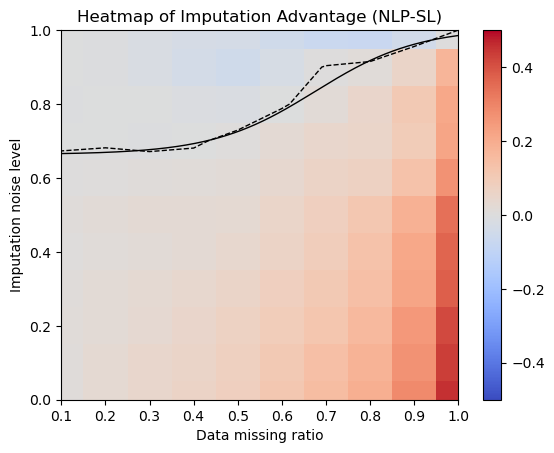

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.interpolate import griddata

# Find the absolute maximum to center the colormap at zero
abs_max = np.max(np.abs(imputation_advantage))

# Plotting the heatmap with corrected orientation
#plt.figure(figsize=(8, 6))
#sns.heatmap(imputation_advantage.T, annot=False, cmap='coolwarm', 
#            xticklabels=corruption_ratios, yticklabels=imputation_noise_levels,
#            vmin=-abs_max, vmax=abs_max)
#heatmap = plt.imshow(imputation_advantage.T, cmap="coolwarm", aspect='auto', interpolation='nearest', origin='lower',vmin=-abs_max, vmax=abs_max)


# Create a grid of evenly spaced values for the X and Y axes
x_new = np.linspace(min(corruption_ratios), max(corruption_ratios), 10)
y_new = np.linspace(min(imputation_noise_levels), max(imputation_noise_levels), 11)

# Create meshgrid for plotting
X_new, Y_new = np.meshgrid(x_new, y_new)

# Interpolate the matrix onto the new grid
points = np.array([(x, y) for x in corruption_ratios for y in imputation_noise_levels])
values = imputation_advantage.flatten()

# Use griddata to interpolate
Z_new = griddata(points, values, (X_new, Y_new), method='cubic')

# Plot the heatmap using `pcolormesh`
#plt.figure(figsize=(10, 8))
c = plt.pcolormesh(X_new, Y_new, Z_new, cmap='coolwarm', shading='auto', vmin=-0.5, vmax=0.5)
plt.colorbar(c)


# Adding a colorbar for reference
#plt.colorbar(heatmap, label='Imputation Advantage')

# Drawing a contour line to separate positive and negative areas
#contour = plt.contour(imputation_advantage.T, levels=[0], colors='black', linewidths=1.0, origin='lower')

# Add a contour line for value = 0
contour = plt.contour(X_new, Y_new, Z_new, levels=[0], colors='black', linewidths=1.0, linestyles='dashed', origin='lower')


all_x = [-100.0, 0.0, 0.4, 0.6, 0.8, 1.0, 100]
all_y = [0.67, 0.67, 0.67, 0.8, 0.9, 1.0, 1.0]


# Example sigmoid function to fit
def func(x, a, b, c, d):
    """
    Sigmoid function with parameters for scale (a) and shift (b).
    
    :param x: Input value or array.
    :param a: Scale factor (default is 1).
    :param b: curvature factor (default is 1).
    :param c: shift factor (default is 0).
    :pparam d: offset factor (default is 0).
    """
    return a / (1 + np.exp(- b* (x - c))) + d

all_x = np.array(all_x)
all_y = np.array(all_y)

# Fit the exponential function to the data
popt, _ = curve_fit(func, all_x, all_y, maxfev = 10000000)
print(popt)

# Get the fitted parameters
#b, c = popt

fitted_line_x = np.linspace(0.0, 1.0, 1000)
# Generate fitted y-values for plotting
fitted_line_y = func(np.array(fitted_line_x), *popt)

plt.plot(fitted_line_x, fitted_line_y, color='black', linewidth=1, linestyle='solid')


# Adding labels and title
plt.title('Heatmap of Imputation Advantage (NLP-SL)')
#plt.xticks(np.arange(len(corruption_ratios)), corruption_ratios)
#plt.yticks(list(np.arange(len(imputation_noise_levels))), imputation_noise_levels)
plt.xlabel('Data missing ratio')
plt.ylabel('Imputation noise level')
plt.xlim(0.1, 1)
plt.ylim(0, 1)
#plt.ylim(0, len(imputation_noise_levels)-1)
# Display the plot
plt.show()

## imputation by wordvec

In [6]:
import re
from collections import defaultdict

# Initialize dictionary to store the data
data = defaultdict(lambda: defaultdict(dict))

# Read the file
file_path = 'save/imputation_wordvec/imputation_wordvec_summary.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

# Parse the file
current_corruption_ratio = None
current_imputation_mode = None

for line in lines:
    line = line.strip()
    if line.startswith("corruption_ratio"):
        # Extract corruption_ratio and subset_ratio
        match = re.search(r'corruption_ratio = ([0-9.]+),.*imputation_mode = \'([^\']+)\'', line)
        if match:
            current_corruption_ratio = float(match.group(1))
            current_imputation_mode = match.group(2)
    elif line and not line.startswith("GLUE score"):
        # Extract task and score
        parts = line.split()
        if len(parts) == 3:
            task, score = parts[1 :]
            try:
                score = float(score)
                # Store in the dictionary
                data[(current_corruption_ratio, current_imputation_mode)][task] = score
            except ValueError:
                pass

print(data)

FileNotFoundError: [Errno 2] No such file or directory: 'save/imputation_wordvec/imputation_wordvec_summary.txt'

In [ ]:
# handle data
# compute glue score
'''
labels = ['CoLA', 'SST-2', 'MRPC', 'STS-B', 'QQP', 'MNLI', 'QNLI', 'RTE', 'WNLI', 'AVG']
labels2 = ['cola', 'sst2', 'mrpc', 'stsb', 'qqp', 'mnli', 'qnli', 'rte', 'wnli', 'glue']
# recompute the average ignoring the 'wnli'
scores_ignore_wnli = scores[:, :-2]
# substract the baseline values
scores_ignore_wnli[:, 1] = scores_ignore_wnli[:, 1] - 0.5  # SST2, index 1, binary classification
scores_ignore_wnli[:, 2] = scores_ignore_wnli[:, 2] - 0.5  # MRPC, index 2, binary classification
scores_ignore_wnli[:, 4] = scores_ignore_wnli[:, 4] - 0.5  # QQP, index 4, binary classification
scores_ignore_wnli[:, 5] = scores_ignore_wnli[:, 5] - 0.33333  # MNLI, index 5, tenary classification
scores_ignore_wnli[:, 6] = scores_ignore_wnli[:, 6] - 0.5  # QNLI, index 6, binary classification
scores_ignore_wnli[:, 7] = scores_ignore_wnli[:, 7] - 0.5  # RTE, index 7, binary classification
'''


for key, value in data.items():
    score = (data[key]['cola']
        + data[key]['sst2'] - 0.5
        + data[key]['mrpc'] - 0.5
        + data[key]['stsb']
        + data[key]['qqp'] - 0.5
        + data[key]['mnli'] -0.33333
        + data[key]['qnli'] - 0.5
        + data[key]['rte'] - 0.5
        ) / 8
    data[key]['score'] = score
print(data)

defaultdict(<function <lambda> at 0x16d0a7f70>, {(0.1, 'none'): defaultdict(<class 'dict'>, {'cola': 0.526242, 'sst2': 0.919725, 'mrpc': 0.833333, 'stsb': 0.880208, 'qqp': 0.904378, 'mnli': 0.839226, 'qnli': 0.911221, 'rte': 0.689531, 'wnli': 0.56338, 'score': 0.45881675}), (0.1, 'wordvec'): defaultdict(<class 'dict'>, {'cola': 0.488724, 'sst2': 0.927752, 'mrpc': 0.848039, 'stsb': 0.877042, 'qqp': 0.90047, 'mnli': 0.831686, 'qnli': 0.908109, 'rte': 0.67509, 'wnli': 0.56338, 'score': 0.45294775}), (0.2, 'none'): defaultdict(<class 'dict'>, {'cola': 0.494477, 'sst2': 0.923165, 'mrpc': 0.835784, 'stsb': 0.873698, 'qqp': 0.896636, 'mnli': 0.830871, 'qnli': 0.903533, 'rte': 0.638989, 'wnli': 0.535211, 'score': 0.445477875}), (0.2, 'wordvec'): defaultdict(<class 'dict'>, {'cola': 0.440964, 'sst2': 0.919725, 'mrpc': 0.808824, 'stsb': 0.874228, 'qqp': 0.891862, 'mnli': 0.825267, 'qnli': 0.901153, 'rte': 0.638989, 'wnli': 0.295775, 'score': 0.43346024999999994}), (0.3, 'none'): defaultdict(<cla

In [ ]:
# prepare data
corruption_ratios = [0.1, 0.2, 0.3, 0.4, 0.5]
scores_imputation_none = []
scores_imputation_wordvec = []

for key, value in data.items():
    corruption_ratio, imputation_mode = key
    index = corruption_ratios.index(corruption_ratio)
    if imputation_mode == 'none':
        scores_imputation_none.append(value['score'])
    else:
        scores_imputation_wordvec.append(value['score'])
print(scores_imputation_none)
print(scores_imputation_wordvec)

[0.45881675, 0.445477875, 0.428329375, 0.41055612499999994, 0.390646625]
[0.45294775, 0.43346024999999994, 0.405652875, 0.33985612499999995, 0.29209775]


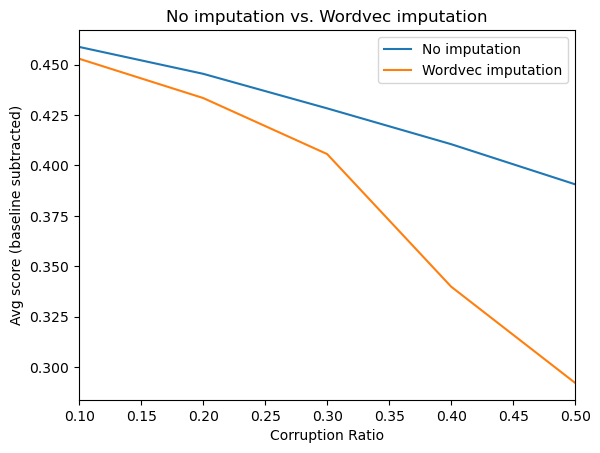

In [ ]:
# plot
import numpy as np        
import matplotlib.pyplot as plt
#plt.figure(figsize=(10, 6))
plt.plot(corruption_ratios, scores_imputation_none, label='No imputation')
plt.plot(corruption_ratios, scores_imputation_wordvec, label='Wordvec imputation')
plt.xlabel('Corruption Ratio')
plt.ylabel('Avg score (baseline subtracted)')
plt.xlim(0.1, 0.5)
plt.title('No imputation vs. Wordvec imputation')
plt.legend()
plt.show()

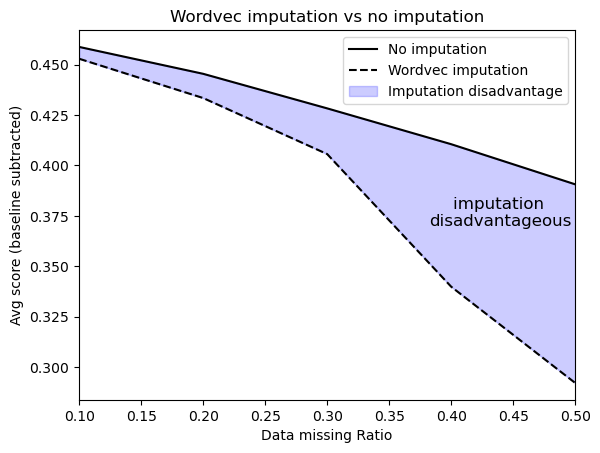

In [ ]:
# plot
import numpy as np        
import matplotlib.pyplot as plt

# Assuming corruption_ratios, scores_imputation_none, and scores_imputation_wordvec are defined

plt.plot(corruption_ratios, scores_imputation_none, label='No imputation', color='black')
plt.plot(corruption_ratios, scores_imputation_wordvec, label='Wordvec imputation', linestyle='--', color='black')

# Fill the area between the two curves
plt.fill_between(corruption_ratios, scores_imputation_none, scores_imputation_wordvec, 
                 where=(np.array(scores_imputation_none) > np.array(scores_imputation_wordvec)), 
                 interpolate=True, color='blue', alpha=0.2, label = "Imputation disadvantage")

# Add text annotation
mid_index = len(corruption_ratios) // 2  # Approximate midpoint for placing the text
mid_x = corruption_ratios[mid_index]
mid_y = (scores_imputation_none[mid_index] + scores_imputation_wordvec[mid_index]) / 2
plt.text(0.44, 0.37, 'imputation \ndisadvantageous', color='black', fontsize=12, ha='center')

# Add labels and legend
plt.xlabel('Data missing Ratio')
plt.ylabel('Avg score (baseline subtracted)')
plt.xlim(0.1, 0.5)
plt.title('Wordvec imputation vs no imputation')
plt.legend()
plt.show()

# imputation by BERT

In [ ]:
# imputation by bert performance
import re
from collections import defaultdict

# Initialize dictionary to store the data
data = defaultdict(lambda: defaultdict(dict))

# Read the file
file_path = 'save/imputation_bert/imputation_bert_summary.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

# Parse the file
current_corruption_ratio = None
current_imputation_mode = None

for line in lines:
    line = line.strip()
    if line.startswith("corruption_ratio"):
        # Extract corruption_ratio and subset_ratio
        match = re.search(r'corruption_ratio = ([0-9.]+),.*imputation_mode = \'([^\']+)\'', line)
        if match:
            current_corruption_ratio = float(match.group(1))
            current_imputation_mode = match.group(2)
    elif line and not line.startswith("GLUE score"):
        # Extract task and score
        parts = line.split()
        if len(parts) == 3:
            task, score = parts[1 :]
            try:
                score = float(score)
                # Store in the dictionary
                data[(current_corruption_ratio, current_imputation_mode)][task] = score
            except ValueError:
                pass

print(data)

defaultdict(<function <lambda> at 0x16d01c310>, {(0.1, 'none'): defaultdict(<class 'dict'>, {'cola': 0.395761, 'sst2': 0.901376, 'mrpc': 0.637255, 'stsb': 0.827937, 'qqp': 0.849641, 'mnli': 0.776668, 'qnli': 0.847703, 'rte': 0.563177, 'wnli': 0.549296}), (0.1, 'bert'): defaultdict(<class 'dict'>, {'cola': 0.37, 'sst2': 0.9002, 'mrpc': 0.5809, 'stsb': 0.8264, 'qqp': 0.8477}), (0.2, 'none'): defaultdict(<class 'dict'>, {'cola': 0.385399, 'sst2': 0.887615, 'mrpc': 0.522059, 'stsb': 0.759275, 'qqp': 0.834751, 'mnli': 0.758227, 'qnli': 0.84093, 'rte': 0.541516, 'wnli': 0.577465}), (0.2, 'bert'): defaultdict(<class 'dict'>, {'cola': 0.379, 'sst2': 0.8979, 'mrpc': 0.5417, 'stsb': 0.8101, 'qqp': 0.839}), (0.3, 'none'): defaultdict(<class 'dict'>, {'cola': 0.237215, 'sst2': 0.896789, 'mrpc': 0.323529, 'stsb': 0.646389, 'qqp': 0.815681, 'mnli': 0.736322, 'qnli': 0.80853, 'rte': 0.541516, 'wnli': 0.56338}), (0.3, 'bert'): defaultdict(<class 'dict'>, {'cola': 0.1024, 'sst2': 0.8922, 'mrpc': 0.5686

In [ ]:
# handle data
# compute glue score
'''
labels = ['CoLA', 'SST-2', 'MRPC', 'STS-B', 'QQP', 'MNLI', 'QNLI', 'RTE', 'WNLI', 'AVG']
labels2 = ['cola', 'sst2', 'mrpc', 'stsb', 'qqp', 'mnli', 'qnli', 'rte', 'wnli', 'glue']
# recompute the average ignoring the 'wnli'
scores_ignore_wnli = scores[:, :-2]
# substract the baseline values
scores_ignore_wnli[:, 1] = scores_ignore_wnli[:, 1] - 0.5  # SST2, index 1, binary classification
scores_ignore_wnli[:, 2] = scores_ignore_wnli[:, 2] - 0.5  # MRPC, index 2, binary classification
scores_ignore_wnli[:, 4] = scores_ignore_wnli[:, 4] - 0.5  # QQP, index 4, binary classification
scores_ignore_wnli[:, 5] = scores_ignore_wnli[:, 5] - 0.33333  # MNLI, index 5, tenary classification
scores_ignore_wnli[:, 6] = scores_ignore_wnli[:, 6] - 0.5  # QNLI, index 6, binary classification
scores_ignore_wnli[:, 7] = scores_ignore_wnli[:, 7] - 0.5  # RTE, index 7, binary classification
'''


for key, value in data.items():
    score = (data[key]['cola']
        + data[key]['sst2'] - 0.5
        + data[key]['mrpc'] - 0.5
        + data[key]['stsb']
        + data[key]['qqp'] - 0.5
        #+ data[key]['mnli'] -0.33333
        #+ data[key]['qnli'] - 0.5
        #+ data[key]['rte'] - 0.5
        ) / 5
    data[key]['score'] = score
print(data)

defaultdict(<function <lambda> at 0x16d01c310>, {(0.1, 'none'): defaultdict(<class 'dict'>, {'cola': 0.395761, 'sst2': 0.901376, 'mrpc': 0.637255, 'stsb': 0.827937, 'qqp': 0.849641, 'mnli': 0.776668, 'qnli': 0.847703, 'rte': 0.563177, 'wnli': 0.549296, 'score': 0.422394}), (0.1, 'bert'): defaultdict(<class 'dict'>, {'cola': 0.37, 'sst2': 0.9002, 'mrpc': 0.5809, 'stsb': 0.8264, 'qqp': 0.8477, 'score': 0.40503999999999996}), (0.2, 'none'): defaultdict(<class 'dict'>, {'cola': 0.385399, 'sst2': 0.887615, 'mrpc': 0.522059, 'stsb': 0.759275, 'qqp': 0.834751, 'mnli': 0.758227, 'qnli': 0.84093, 'rte': 0.541516, 'wnli': 0.577465, 'score': 0.3778198}), (0.2, 'bert'): defaultdict(<class 'dict'>, {'cola': 0.379, 'sst2': 0.8979, 'mrpc': 0.5417, 'stsb': 0.8101, 'qqp': 0.839, 'score': 0.39353999999999995}), (0.3, 'none'): defaultdict(<class 'dict'>, {'cola': 0.237215, 'sst2': 0.896789, 'mrpc': 0.323529, 'stsb': 0.646389, 'qqp': 0.815681, 'mnli': 0.736322, 'qnli': 0.80853, 'rte': 0.541516, 'wnli': 0.

In [ ]:
# prepare data
corruption_ratios = [0.1, 0.2, 0.3, 0.4]
scores_imputation_none = []
scores_imputation_bert = []

for key, value in data.items():
    corruption_ratio, imputation_mode = key
    if corruption_ratio not in corruption_ratios:
        continue
    index = corruption_ratios.index(corruption_ratio)
    if imputation_mode == 'none':
        scores_imputation_none.append(value['score'])
    else:
        scores_imputation_bert.append(value['score'])
print(scores_imputation_none)
print(scores_imputation_bert)

[0.422394, 0.3778198, 0.28392059999999997, 0.268967]
[0.40503999999999996, 0.39353999999999995, 0.32728, 0.29018]


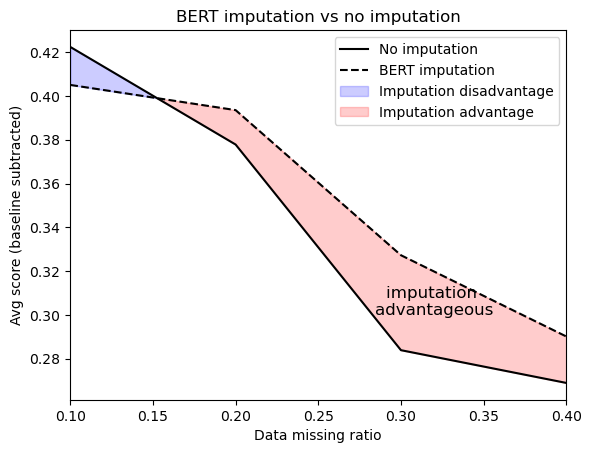

In [ ]:
# plot
import numpy as np        
import matplotlib.pyplot as plt
#plt.figure(figsize=(10, 6))
plt.plot(corruption_ratios, scores_imputation_none, label='No imputation', color='black')
plt.plot(corruption_ratios, scores_imputation_bert, label='BERT imputation', linestyle='--', color='black')


# Fill the area between the two curves
plt.fill_between(corruption_ratios, scores_imputation_none, scores_imputation_bert, 
                 where=(np.array(scores_imputation_none) > np.array(scores_imputation_bert)), 
                 interpolate=True, color='blue', alpha=0.2, label = "Imputation disadvantage")

plt.fill_between(corruption_ratios, scores_imputation_none, scores_imputation_bert, 
                 where=(np.array(scores_imputation_none) < np.array(scores_imputation_bert)), 
                 interpolate=True, color='red', alpha=0.2, label = "Imputation advantage")

# Add text annotation
mid_index = len(corruption_ratios) // 2  # Approximate midpoint for placing the text
mid_x = corruption_ratios[mid_index]
mid_y = (scores_imputation_none[mid_index] + scores_imputation_wordvec[mid_index]) / 2
plt.text(0.32, 0.30, 'imputation \nadvantageous', color='black', fontsize=12, ha='center')


plt.xlabel('Data missing ratio')
plt.ylabel('Avg score (baseline subtracted)')
plt.xlim(0.1, 0.4)
plt.title('BERT imputation vs no imputation')
plt.legend()
plt.show()